Adquisición de datos en Python
------------------------------------------------------

## Introducción

A continuación encontraréis una posible solución a los ejercicios propuestos en la PRACTICA'.  Tened en cuentra que pueden existir otras maneras de resolver los ejercicios, que también son válidas ( y que también permiten obtener la máxima puntuación del ejercicio)

---

## Ejercicios y preguntas teóricas para la PRÁCTICA

A continuación, encontraréis los **ejercicios y preguntas teóricas que debéis completar en esta PEC** y que forman parte de la evaluación de esta unidad.

### Ejercicio 1


La librería Tweepy nos permite interactuar con la API de Twitter de una forma sencilla.  Utilizando la librería Tweepy, recuperad la descripción, la fecha de creación y localización de vuestra cuenta de Twitter.  Si lo preferís, podéis obtener dicha información de la cuenta del usuario de Twitter de la Python Software Foundation, `ThePSF`( en vez de utilizar vuestra cuenta). **(1 punto)** <span style="font-family: Courier New; background-color: #82b74b; color: #000000; padding: 2px; ">NM</span>

**Nota**: Necesitáis las claves ***Consumer API keys y Access token & acces token secret***.  Para obtener las claves, seguid las indicaciones que encontraréis en el Notebook de esta unidad.  Podéis utilizar el código presente en el Notebook, adaptándolo para resolver el ejercicio. 

**Respuesta**

In [3]:
import tweepy

#Definimos las claves: consumer API keys y access token & acces token secret

consumer_key = 'xxxxxxxx'
consumer_secret = 'xxxxxxx'
access_token = 'xxxxxxx'
access_secret = 'xxxxxx'


# Inicializamos la interacación con la API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Definimos el user
user = api.get_user('thePSF')

#Descargamos los datos descripción, fecha de creación y localización
print ("Descripción: {}".format(user.description))
print ("Fecha: {}".format(user.created_at))
print("Lugar: {}".format(user.location))

Descripción: The Python Software Foundation. For help with Python code, see comp.lang.python.
Fecha: 2009-08-08 01:26:03
Lugar: Everywhere Python is!


### Ejercicio 2

Implementad un conjunto de funciones para obtener la **secuencia de ADN** del organismo *Homo sapiens* del cromosoma 1 (**chr1**) desde la posición 100000 hasta 101000 para la referencia **hg19**.  Para realizar el ejercicio utilizad la API de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html).

**Nota**: El genoma de referencia de una célula es un repositorio de secuencias de ADN ( ácido desoxirribonucleico) empaquetado en forma de cromosoma. El ADN es un ácido nucleico que contiene la información genética que dirige el desarrollo y el funcionamiento de todos los seres vivos. El ADN se puede entender como una secuencia de nucleótidos (A, C, T y G) de una determinada longitud.  Este material hereditario codifica los genes que, una vez descifrados, son indispensables para la síntesis de las proteínas. 

Un genoma de referencia es la representación de la secuencia de ADN del genoma de una especie.  En el caso del organismo *Homo sapiens*, existen diferentes versiones del genoma de referencia.  La última versión, hg38, se publicó en el 2014 y es la más detallada y precisa.

UCSC es un navegador de la Universidad de Santa Cruz de California que ofrece acceso a secuencias genómicas y su correspondiente anotación (genes, mRNAs, CpG,…) de una gran variedad de organismos, vertebrados e invertebrados. 

Referencia: [Genómica Computacional](http://discovery.uoc.edu/iii/encore/record/C__Rb1046448__Sgenomica%20Computacional__Orightresult__U__X7?lang=cat&suite=def). Enrique Blanco. Barcelona, Universitat Oberta de Catalunya, 2011.

**Importante**: No es necesario entender toda la información que podéis obtener a través de la API de UCSC. Fijaros bien con lo que os pide el enunciado ( prestad atención a la palabras clave en negrita), y revisad los ejemplos de acceso a los datos que hay en la web de [UCSC](https://genome.ucsc.edu/goldenPath/help/api.html).


**Respuesta**

In [1]:
import requests
import json

def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data


def get_sequence_UCSC(genome_ref, chrom, start, end):
    # Query the data from the API
    base_url='http://api.genome.ucsc.edu/getData/sequence?genome=%s;chrom=%s;start=%s;end=%s'
    
    response = requests.get(base_url % (genome_ref, chrom, start, end))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    if data:
        
     dna = data.get('dna')
    
    return (dna)
    
genome_ref = 'hg19'
chrom = 'chr1'
start='100000'
end='101000'
sequence_data = get_sequence_UCSC(genome_ref, chrom, start,end)

print (sequence_data)

actaagcacacagagaataatgtctagaatctgagtgccatgttatcaaattgtactgagactcttgcagtcacacaggctgacatgtaagcatcgccatgcctagtacagactctccctgcagatgaaattatatgggatgctaaattataatgagaacaatgtttggtgagccaaaactacaacaagggaagctaattggatgaatttataaaaatatgcctcagccaaaatagcttaattcactctcccttatcataaggataatcttgcctaaagggacagtaatattAAAGACACTAGGAATAACCTCTGTACTTTGGACAGTAGACCTGCATAGCCCattaggcctcaatgaagtcttatgcaagaccagaagccaatttgccatttaaggtgattctccatgtttctgctctaaCTGTGCTTCACAATACTCAAAACACTAAATCAGGATGTTTCCTGGAGTTCAGGGAGCTGTCCGTGTTACTGAGCAGTTCTCAGCAACACAAAGATCCTACTGACTCCTCATCAGACTTCTTTCTCACTGGAATTTTACACCTGGGCTGTTAACACCAGGCCAGGTCAAATTCAAAGGAGAGAAAAAAGCTCATTATGAAGGGTAAAATCCAAAACACTGTGCATAAAGATATGGCACAATTTTTATACATAAAGATTTCATAAAACCAAAGCATCAGGAAATGAAAAGAGATACAGAAAGAAAAATGATGGTAAATGAGACATTAATTTACCCTTCTAATCTCTATCACAGCAAAAAGATAATTAAAAAATCTATATGAGGACCACAAAATACACAAAAATTATGTAGCAAAGCCTATAGCCTGAAAAAGTAAACATTGAAATTTGTATGTCCATAAAATGTTTACAAAATTCAGTACATATTACACACCCCACCCTAAAAACATCTAAGCAAAGTAGAGAATGTAGAAATGCTACAGATTATATTCTCTGATTATGACACAACAAAACTAGAAATTAC

### Ejercicio 3

Dada la API de UCSC del ejercicio anterior, obtened la longitud del chr1 del organismo *Homo sapiens* según la versión del genoma de referencia hg19.  Calculad la diferencia entre la longitud del cromosoma chr1 entre las versiones hg19 y hg38.

**Respuesta**

In [4]:
import requests
import json

def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data



def get_chr_UCSC(genome_ref):
    # Query the data from the API
    base_url='http://api.genome.ucsc.edu/list/chromosomes?genome=%s'
    
    response = requests.get(base_url % (genome_ref))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    if data:
        
     chr = data.get('chromosomes')
      
    return (chr)
    
genome_ref = 'hg19'

chr_data_hg19 = get_chr_UCSC(genome_ref)

genome_ref='hg38'

chr_data_hg38 = get_chr_UCSC(genome_ref)

diff = abs(chr_data_hg38['chr1']-chr_data_hg19['chr1'])

print ('La diferencia de longitud del chr1 de los genomas de referencia hg38 i hg19 es' , diff, 'bp')

La diferencia de longitud del chr1 de los genomas de referencia hg38 i hg19 es 294199 bp


### Ejercicio 4

La [NASA](https://www.nasa.gov) mediante su [API](https://api.nasa.gov) publica cada día una imagen de astronomía.  Implementad una función para descargar y visualizar la imagen dentro del notebook.

**Respuesta**

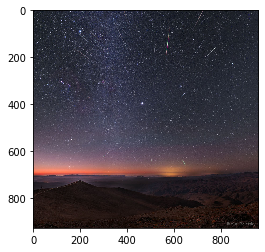

In [2]:

import requests
import json
import IPython
from matplotlib import pyplot as plt
from io import BytesIO
from PIL import Image

def parse_response(response):
    data = None
    if response.status_code == 200:
        # Data is formatted as JSON but received as string. Load it as JSON object
        data = json.loads(response.content)        
    
    # Raise an error otherwise    
    else:
        raise Exception("Unexpected response (%s: %s)." %(response.status_code, response.reason))
    
    return data


def get_imatge_nasa(api_key):
    # Query the data from the API
    base_url ='https://api.nasa.gov/planetary/apod?api_key=%s'

    # We also add the API KEY to the request
    response = requests.get(base_url % (api_key))
    
    # Check the response code and act accordingly
    data = parse_response(response)
    
    data

    return (data)

# Enter API key
api_key = 'xxxxxxxxxxxxxx'
data = get_imatge_nasa(api_key)

#Opción A: Primero comprobamos que el archivo corresponde a una imagen.
#Después, el contenido de la imagen mediante matplotlib

if data['media_type'] == "image": 
    tmp=requests.get(data.get('url'))
    img= Image.open(BytesIO(tmp.content))
    plt.imshow(img)
    plt.show()
else:
    print("Media Type (%s)." %(data['media_type']))  

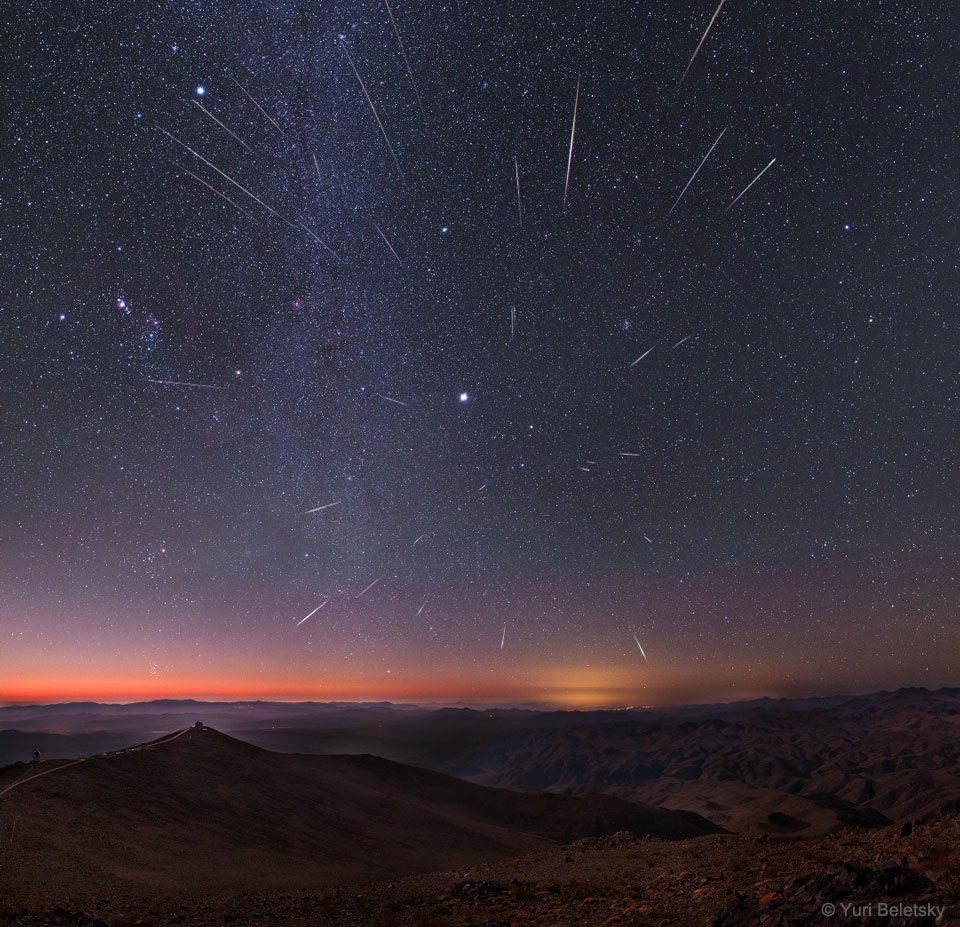

In [4]:
#Opción B: Utilizamos IPython para visualizar la imagen

if data['media_type'] == "image":
    
    img=IPython.display.Image(data.get('url'))

else:

    img="Media Type (%s)" %(data['media_type'])

img

**Respuesta**

### Ejercicio 5

Queremos conocer la Agenda de actos de  la Anella Olímpica de la ciudad de Barcelona.  Imprimid por pantalla el nombre del grupo o cantante que celebrará un concierto en la Anella Olímpica durante el año 2020.  Para realizar el ejercicio, consultad el portal de datos abiertos del Ayuntamiento de Barcelona mediante la siguiente [url](https://opendata-ajuntament.barcelona.cat/es/).  Primero tenéis que identificar qué métode utilizar para descargar los datos. Seguidamente, descargad los datos y procesarlos para responder la pregunta.

**Respuesta**

In [9]:
#Consultad la url y descargad los datos "actosanella.json"
# En el path donde se han guardado los datos
import json

#Cargamos los datos
with open ('actosanella.json') as json_data:
    data=json.load(json_data)

#Seleccionamos categoría "actes"
data2 = data['actes']
      
for tmp in data2['acte']:

#Aplicamos un condicional para seleccionar los conciertos del 2020
        if tmp['date'][0:4] == '2020' and tmp['acte_type'] == 'Concierto':
            
                print(tmp['name'])
    

Adexe & Nau
Hatsune Miku VIP
Hatsune Miku
Dream Theater
Sabaton
Halsey
FernandoCosta
Arnau Griso
Jonas Brothers
Izal
AbroadFest
The 1975
The Cat Empire
Maluma
Bon Iver
Nick Cave
Beret
Elton John 2/10/2020
Elton John 3/10/2020
